In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data

data = pd.read_csv('penguins.csv')

data.y.value_counts()


Adelie       151
Gentoo       123
Chinstrap     68
Name: y, dtype: int64

In [19]:
#split the data into x and y

x  = data.iloc[:,1:]
y = data.y
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
337,55.8,19.8,207.0,4000.0
338,43.5,18.1,202.0,3400.0
339,49.6,18.2,193.0,3775.0
340,50.8,19.0,210.0,4100.0


In [7]:
#preprocessing data

from sklearn.preprocessing import StandardScaler


scaler  =  StandardScaler() #initialize the model

scaled_x   =  scaler.fit_transform(x)  #scaled x using standard scaler

In [9]:
x_final  =   pd.DataFrame(data= scaled_x, columns= x.columns)
x_final

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
337,2.178824,1.343286,0.433355,-0.251947
338,-0.077396,0.481175,0.077258,-1.001215
339,1.041543,0.531887,-0.563715,-0.532923
340,1.261662,0.937586,0.647013,-0.127069


In [10]:
#import algorithm
from sklearn.cluster import KMeans

In [30]:
k_model  =  KMeans(n_clusters= 3 , random_state=10)  #initiliaz model

In [31]:
#train model

k_model.fit(x_final)  

KMeans(n_clusters=3, random_state=10)

In [23]:
#predict on test
my_model_predictions  = k_model.predict(x_final)
#my_model_predictions
k_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 3,
       1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3,
       3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3,
       1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,

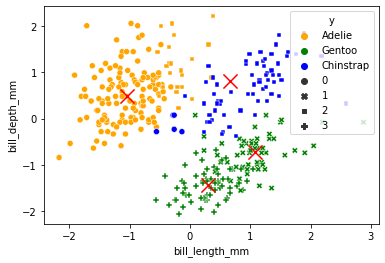

In [29]:
sns.scatterplot( x  = 'bill_length_mm', 
                y= 'bill_depth_mm', 
                data =  x_final,
                hue= y, style= 
                k_model.labels_, 
                palette=['orange', 'green', 'blue'])




plt.scatter( k_model.cluster_centers_[:, 0], 
            k_model.cluster_centers_[:,1], 
            marker = 'x', 
            s  =  200, 
            c= 'red')

In [39]:
#optimal number of k --finding number is a challenge

#hint ---> elbow   method  --> optimal number of clusters









In [20]:
#evalaute  clusters 


#classiification --> accuracy , precision, recall , f score
#regression --> mse, mae ,  r2 score, adj. r2
#clustering  ---> siloutte score

from sklearn.metrics import silhouette_score

print(silhouette_score(x_final, k_model.labels_ , metric='euclidean'))



0.4472192983966046
